# UNDERWORLD
## Viscoplastic mantle convection
###### Rohan Byrne, University of Melbourne, 2019

How can one rheology unify lithospheric processes with mantle processes? In 1998, Moresi and Solomatov (1) demonstrated a simple but powerful viscoplastic approximation which allowed dynamic formation of a rigid, strain-localising upper boundary over a classic temperature-dependent viscous mantle. The surprising result was a versatile model that not only replicated Earth-like processes, but also changed the way we look at our sister planet Venus.

![alt](episodic/fig.gif)

### IN BRIEF

The model uses a viscoplastic rheology. Below a nominal stress threshold, the viscosity is exponentially and inversely temperature dependant; above it, the viscosity becomes stress dependant, with the stress threshold itself determined by an absolute term, $\tau_0$, and a depth-dependant term, $\tau_1$. This allows stress to become localised, recreating the brittle deformation of the real lithosphere compared to the ductile deformation of the mantle.

| **Creep viscosity** | **Plastic viscosity** | **Effective viscosity** |
| --- | --- | --- |
| $\eta_{creep}(T) = \Delta \eta^{-T} $ <br> where <br> $\Delta \eta$ <br> is the mantle viscosity contrast | $\eta_{yield}(D) = \frac{\tau_{yield}}{D} $ <br> where <br> $ \tau_{yield} = \tau_0 + \tau_1 z $ <br> and <br> $D$ <br> is the second strain-rate invariant. | $ \eta = min (\eta_{creep},  \eta_{plastic}) $ |

By varying $\tau_0$, the relative dominance of each deformation mechanism is affected, verging toward isoviscous behaviour at one extreme, and stagnant behaviour at the other. However, inbetween these values, a novel 'episodic' regime is observed: arguably the first 'tectonic mode' to be discovered in simulation.

| Mobile regime: $\tau_0 = 1e5$ | Episodic regime: $\tau_0 = 4e5$ | Stagnant regime: $\tau_0 = 1e6$ |
| :---: | :---: | :---: |
|![alt](mobile/fig.gif) | ![alt](episodic/fig.gif) | ![alt](stagnant/fig.gif)|

*Beginning with a sinusoidal initial state, most models quickly converge on steady-state endmembers. However, at intermediate values, the system achieves a stable but periodic state in which the lid cycles between mobile and stagnant in perpetuity. This is the 'episodic overturn' regime.**

Each mode is best characterised by the plot of its Nussel number - the dimensionless surface gradient - over time. The mobile and stagnant regimes each predominant over wide swathes of parameter space. Yet, within a narrow band of $\tau_0$ values between regimes, the episodic regime arises.

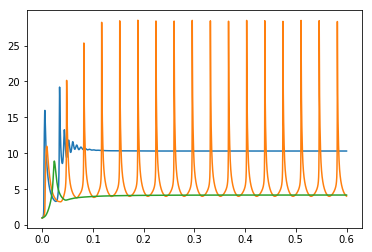

In [27]:
import numpy as np
import matplotlib.pyplot as plt

mobile_array = np.genfromtxt('mobile/zerodData.csv', delimiter=',')
episodic_array = np.genfromtxt('episodic/zerodData.csv', delimiter=',')
stagnant_array = np.genfromtxt('stagnant/zerodData.csv', delimiter=',')

ignoreme = plt.plot(mobile_array[:,2], mobile_array[:,3])
ignoreme = plt.plot(episodic_array[:,2], episodic_array[:,3])
ignoreme = plt.plot(stagnant_array[:,2], stagnant_array[:,3])

*Nusselt number against dimensionless time for the stagnant (green), episodic (orange), and mobile (blue) cases. All began from the same initial sinusoidal condition. The endmember cases form an envelope for the time average of the intermediate case.*

Interestingly, each failure event is identical in Nusselt profile, exhibiting a steep spike and a long tail. The tail eventually converges on the stagnant steady-state line, while the time average of solely the peaks converges on the mobile steady-state value. In other words, the episodic regime relates to its neighbours by the frequency of failure events, smoothly converging on the stagnant state when spacing is great, and on the mobile state when spacing is small.

### MODEL

**Underworld2** is a modern descendant of the code originally used for this groundbreaking study. Its robust framework, powerful solvers, and versatile design can make short work of even very complicated geophysical models.

Hit **Show Code** to see how *Underworld* was used to reproduce and expand on these classic results.

In [2]:
import planetengine

import MS98ann_systemscript as systemscript
import MS98ann_handlerscript as handlerscript
import MS98ann_initialscript as initialscript

suite_list = planetengine.suite_list({
    'res': [64],
    'tau0': [1e5, 4e5, 1e6],
    })

for row in suite_list:
    model = planetengine.Model(
        systemscript.build(**row),
        handlerscript.build(),
        initialscript.build(),
        )

    checkpointCondition = lambda: any([
        model.status == 'pre-traverse',
        model.step.value % 1000 == 0,
        model.status == 'post-traverse',
        ])
    collectCondition = lambda: model.step.value % 10 == 0
    stopCondition = lambda: model.modeltime.value > 0.6

    model.traverse(stopCondition, collectCondition, checkpointCondition)

1) Moresi and Solomatov 1998, 'Mantle convection with a brittle lithosphere: thoughts on the global tectonic styles of the Earth and Venus', Geophysical Journal International, 133, 669–682